In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat
import unicodedata, re



In [2]:
#loading the data 

df1 = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 0)

df2 = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 1)

df3 = pd.read_excel("data/raw/Observations 2012-2025.xlsx", sheet_name = 2)




In [5]:
df_species = df1.copy()
df_sites = df2.copy()
df_observations = df3.copy()
print(df_observations.iloc[:,-3].unique())


[nan 'A+V (sans "Vol")' 1 2 3 4 9 5 10 20 11 6 14 7 8 15 17 0 40 13 16 50
 30 12 19 25 35 51 123 41 34 38 42 26 27 36 18 21 22 23 100 28 31
 0.714285714285714 0.428571428571424 0.142857142857145 24 37 67 53 62 45
 44 152 39 ' v' 1.66666666666667 29 121 32 102 70 150 80 58 132 120 47 '1'
 '2' 75 69 65 55 54 90 33 57 59 200]


In [6]:
#removing empty columns
del df_species["Unnamed: 0"]
del df_species["Unnamed: 1"]




df_species.columns = ["French Name", "Latin Name", "Origin"]
df_species.loc[len(df_species)] = ['Aigrette bleue', 'Egretta caerulea', 'Migrateur']

# ligne à ajouter (elle est prise pour les noms des colonnes au chargement)
# ['Aigrette bleue', 'Egretta caerulea', 'Migrateur']


del df_sites["Unnamed: 0"]
del df_sites["Unnamed: 1"]

# removing the first line containing the names of the columns
df_sites.drop(0, inplace = True) 

# Renaming the columns names for sites 
df_sites.columns = ["Transect", "X","Y","Type","Site","Site2"]
#Regular expression: starts with S, then digits, then P, then digits
pattern = re.compile(r"^S\d+P\d+$")

df_sites["valid_format"] = df_sites["Site2"].apply(lambda x: bool(pattern.match(str(x))))
invalid_sites = df_sites[~df_sites["valid_format"]]

print(f"Total rows: {len(df_sites)}")
print(f"Rows with invalid format: {len(invalid_sites)}\n")

if not invalid_sites.empty:
    print("Values not matching the format:")
    display(invalid_sites[["Site2"]])
else:
    print("All values in column 'Site2' follow the format S<number>P<number>.")

df_sites.loc[1, "Site2"] = "S1P1"
print(df_sites.loc[1, "Site2"])
#removing the name and the department code for the observations and the distance of visualizations
# to make more space
del df_observations["code département"]
df_observations.drop(0, inplace = True) 
df_observations.drop(1, inplace = True) 



def clean_to_int(series):
    """
    Convert a mixed-type pandas Series to integer safely.
    
    - Non-numeric values -> NaN
    - Floats -> rounded to nearest integer
    - Returns pandas nullable Int64 dtype to preserve NaNs
    """
    return  pd.to_numeric(series, errors='coerce').round().astype('Int64').clip(lower=0)


df_observations.iloc[:,-2] = clean_to_int(df_observations.iloc[:,-2])
df_observations.iloc[:,-3] = clean_to_int(df_observations.iloc[:,-3])

df_observations["Amount"] = df_observations.iloc[:,-2] + df_observations.iloc[:,-3] 

cols_to_rename = df_observations.columns[-6:-2]
new_names = ["Auditif", "Visuel", "A+V", "A+V Vol"]

rename_dict = dict(zip(cols_to_rename, new_names))
df_observations = df_observations.rename(columns=rename_dict)

def cast_as_float(x):
    if x == " " or x == np.nan:
        return np.nan
    else:
        return float(x)
    
df_observations["nuages"] = df_observations["nuages"].apply(cast_as_float)

df_observations['date'] = pd.to_datetime(df_observations['date'])
df_observations['year'] = df_observations['date'].dt.year





df_observations["Auditif"] = clean_to_int(df_observations["Auditif"])
df_observations["Visuel"] = clean_to_int(df_observations["Visuel"])
df_observations["A+V"] = clean_to_int(df_observations["A+V"])
df_observations["A+V Vol"] = clean_to_int(df_observations["A+V Vol"])





def normalize_str(s):
    if pd.isna(s):
        return s
    s = str(s)
    s = s.strip()                         # remove leading/trailing spaces
    s = " ".join(s.split())               # normalize internal spacing
    s = s.lower()                         # lowercase
    s = unicodedata.normalize("NFKC", s)  # normalize unicode accents
    return s

df_species["clean_name"] = df_species["French Name"].apply(normalize_str)
df_observations["clean_espece"] = df_observations["ESPECE"].apply(normalize_str)
df_observations["Nom transect"] = df_observations["Nom transect"].apply(normalize_str)
df_sites["Transect"] = df_sites["Transect"].apply(normalize_str)
df_observations["Nom transect"] = df_observations["Nom transect"].replace("desmarinière", "desmarinières")

Total rows: 650
Rows with invalid format: 1

Values not matching the format:


,Site2
1,SIPI


S1P1


In [7]:
df_observations

,Nom observateur,Nom transect,date,"1er, 2e ou 3e passage",nuages,pluie,vent,visibilité,N° point,heure début,...,Unnamed: 19,Unnamed: 20,Auditif,Visuel,A+V,A+V Vol,Unnamed: 25,Amount,year,clean_espece
2,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,1,0,1,1,NaN,2,2014,sucrier à ventre jaune
3,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,0,1,1,1,NaN,2,2014,sporophile cici
4,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,0,2,2,2,NaN,4,2014,colibri falle-vert
5,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,1,0,1,1,NaN,2,2014,elénie siffleuse
6,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,1,0,1,1,NaN,2,2014,coulicou manioc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114492,MAUGEE Lévy,post-colon,2025-05-01,1.0,2.0,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,2,0,2,2,NaN,4,2025,sporophile rougegorge
114493,MAUGEE Lévy,post-colon,2025-05-01,1.0,2.0,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,1,0,1,1,NaN,2,2025,saltator gros-bec
114494,MAUGEE Lévy,post-colon,2025-05-01,1.0,2.0,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,2,0,2,2,NaN,4,2025,sucrier à ventre jaune
114495,MAUGEE Lévy,post-colon,2025-05-01,1.0,2.0,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,3,0,3,3,NaN,6,2025,viréo à moustaches


In [8]:
df_sites

,Transect,X,Y,Type,Site,Site2,valid_format
1,aéroport,714593,1614233,Mangrove,S1,S1P1,False
2,aéroport,714416,1614194,Mangrove,S1,S1P2,True
3,aéroport,714133,1614141,Mangrove,S1,S1P3,True
4,aéroport,713914,1614103,Mangrove,S1,S1P4,True
5,aéroport,713719,1614062,Mangrove,S1,S1P5,True
...,...,...,...,...,...,...,...
646,bois pothau,723470,1626744,Agricole,S65,S65P6,True
647,bois pothau,723445,1626828,Agricole,S65,S65P7,True
648,bois pothau,723427,1626945,Forêt sèche,S65,S65P8,True
649,bois pothau,723481,1627061,Forêt sèche,S65,S65P9,True


In [9]:
# Descrbing the tables dimensions

def describe(df, df_name):
    print("Description of ",df_name)
    nLines, nColums = df.shape
    print("Number of lines :",nLines)
    print("Number of columns :",nColums)
    print("Columns names :  ", " - ".join(df.keys()))
    print("")

describe(df_species, "df_species")
describe(df_sites, "df_sites")
describe(df_observations, "df_observations")



Description of  df_species
Number of lines : 87
Number of columns : 4
Columns names :   French Name - Latin Name - Origin - clean_name

Description of  df_sites
Number of lines : 650
Number of columns : 7
Columns names :   Transect - X - Y - Type - Site - Site2 - valid_format

Description of  df_observations
Number of lines : 114495
Number of columns : 28
Columns names :   Nom observateur - Nom transect - date - 1er, 2e ou 3e passage - nuages - pluie - vent - visibilité - N° point - heure début - ESPECE - distances de contact - Unnamed: 13 - Unnamed: 14 - Unnamed: 15 - Unnamed: 16 - Unnamed: 17 - Unnamed: 18 - Unnamed: 19 - Unnamed: 20 - Auditif - Visuel - A+V - A+V Vol - Unnamed: 25 - Amount - year - clean_espece



In [10]:
#Describing

print(f"There are {len(df_sites["Transect"].unique())} differents transects.")

print(f"There are {len(df_sites["Type"].unique())} differents types of transects.")

print("")
print(f"There are {len(df_species)} differents species")

# let's check each transect has 10 points

numberPoints = {i: 0 for i in df_sites["Transect"].unique()}

for val in df_sites["Transect"]:
    numberPoints[val] += 1

flag = True

for transect in numberPoints:
    if numberPoints[transect] != 10:
        print(f"Transect {transect} has {numberPoints[transect]} points")
        flag = False

if flag :
    print("Every transect has 10 points.")





There are 65 differents transects.
There are 7 differents types of transects.

There are 87 differents species
Every transect has 10 points.


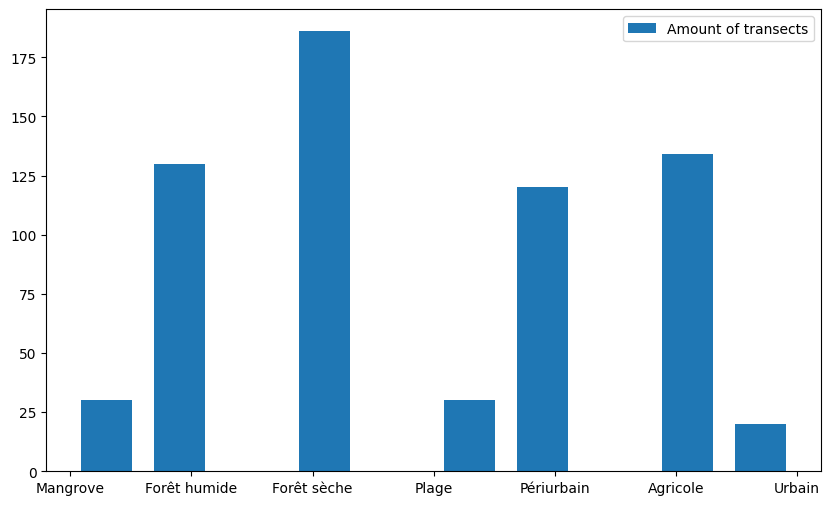

In [11]:

plt.figure(figsize = (10, 6))

n, bins, patches = plt.hist(df_sites["Type"], label = "Amount of transects", rwidth  = 0.7)



plt.legend()
plt.show()

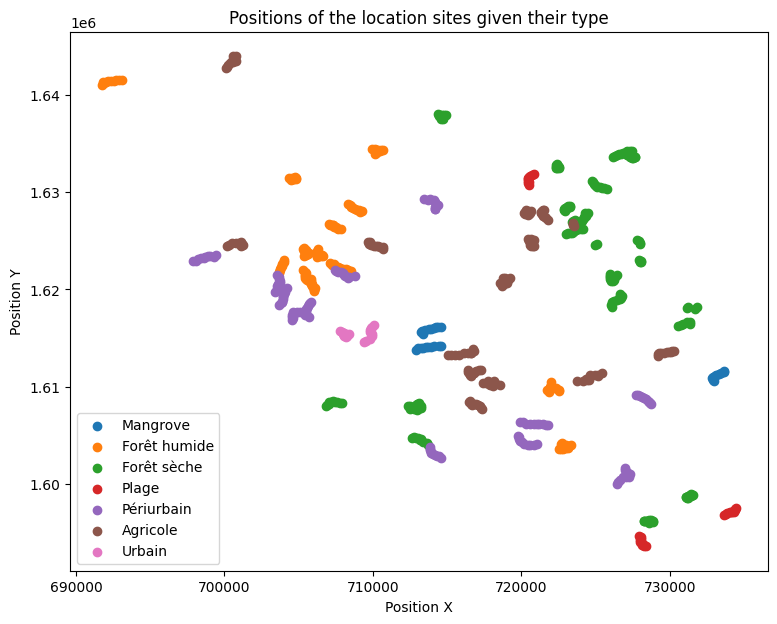

In [12]:

# Plotting the transects
import matplotlib
plt.figure(figsize = (9, 7))


locationTypes = df_sites["Type"].unique()


cmap = matplotlib.colormaps.get_cmap('tab10')

for i, t in enumerate(locationTypes):
    group = df_sites[df_sites["Type"] == t]
    plt.scatter(group["X"], group["Y"], label = t, color = cmap(i))

plt.title("Positions of the location sites given their type")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.legend()
plt.savefig("figures/positions.jpeg")
plt.show()


In [13]:

def plot_distribution(ax, x, xlabel, ylabel, title):
    Nbins = len(x.unique())
    length = len(x)
    counts, bins, patches = ax.hist(x)


    for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
        x = (bin_left + bin_right) / 2
        y = count
        label = f"{(100*count / length):.3f}"
    
        if y > 0:
            ax.text(x, y, label+ "%", ha = 'center', va='bottom')

    for i, patch in enumerate(patches):
        patch.set_facecolor(cmap(i / len(patches)))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    


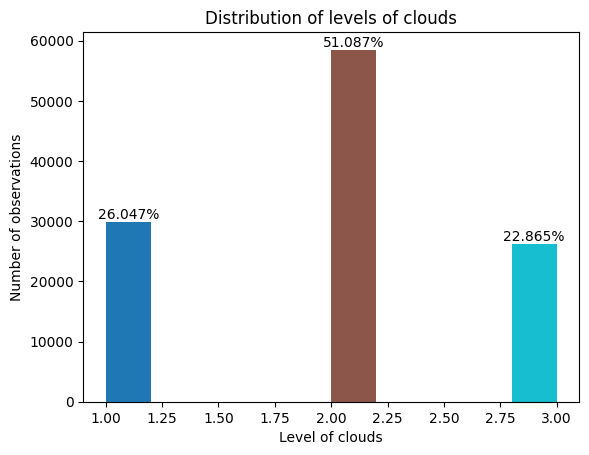

In [14]:
fig, ax = plt.subplots()

plot_distribution(ax, df_observations["nuages"], "Level of clouds", "Number of observations", "Distribution of levels of clouds" )
plt.savefig("figures/cloudLevel.jpeg")


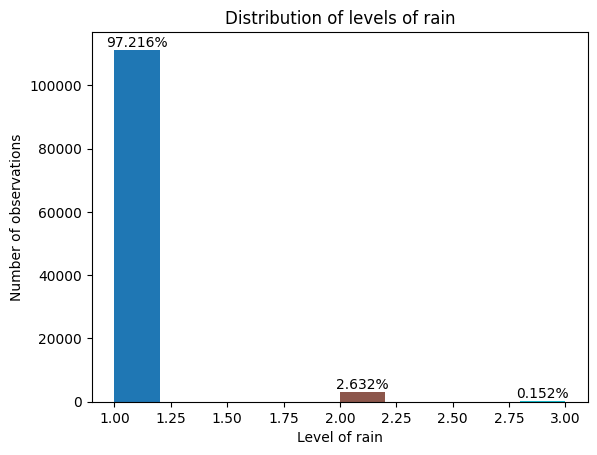

In [15]:
fig, ax = plt.subplots()
plot_distribution(ax,df_observations["pluie"], "Level of rain", "Number of observations", "Distribution of levels of rain" )
plt.savefig("figures/rainLevel.jpeg")

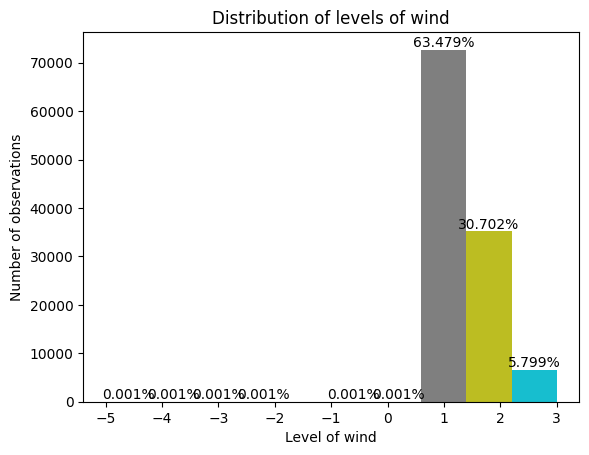

In [21]:
fig, ax = plt.subplots()
plot_distribution(ax, df_observations["vent"], "Level of wind", "Number of observations", "Distribution of levels of wind" )
plt.savefig("figures/windLevel.jpeg")


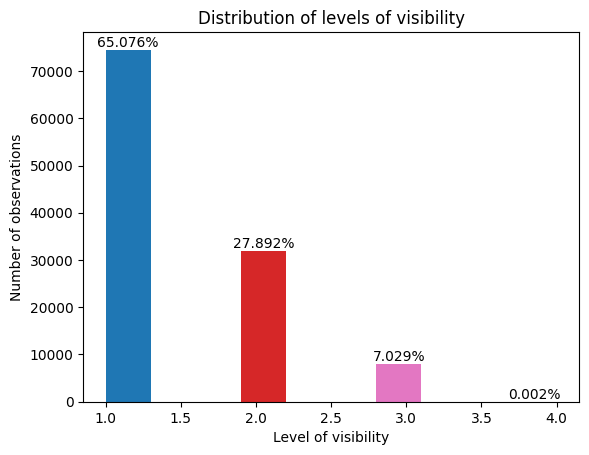

In [16]:
fig, ax = plt.subplots()
plot_distribution(ax, df_observations["visibilité"], "Level of visibility", "Number of observations", "Distribution of levels of visibility" )
plt.savefig("figures/visibilityLevel.jpeg")


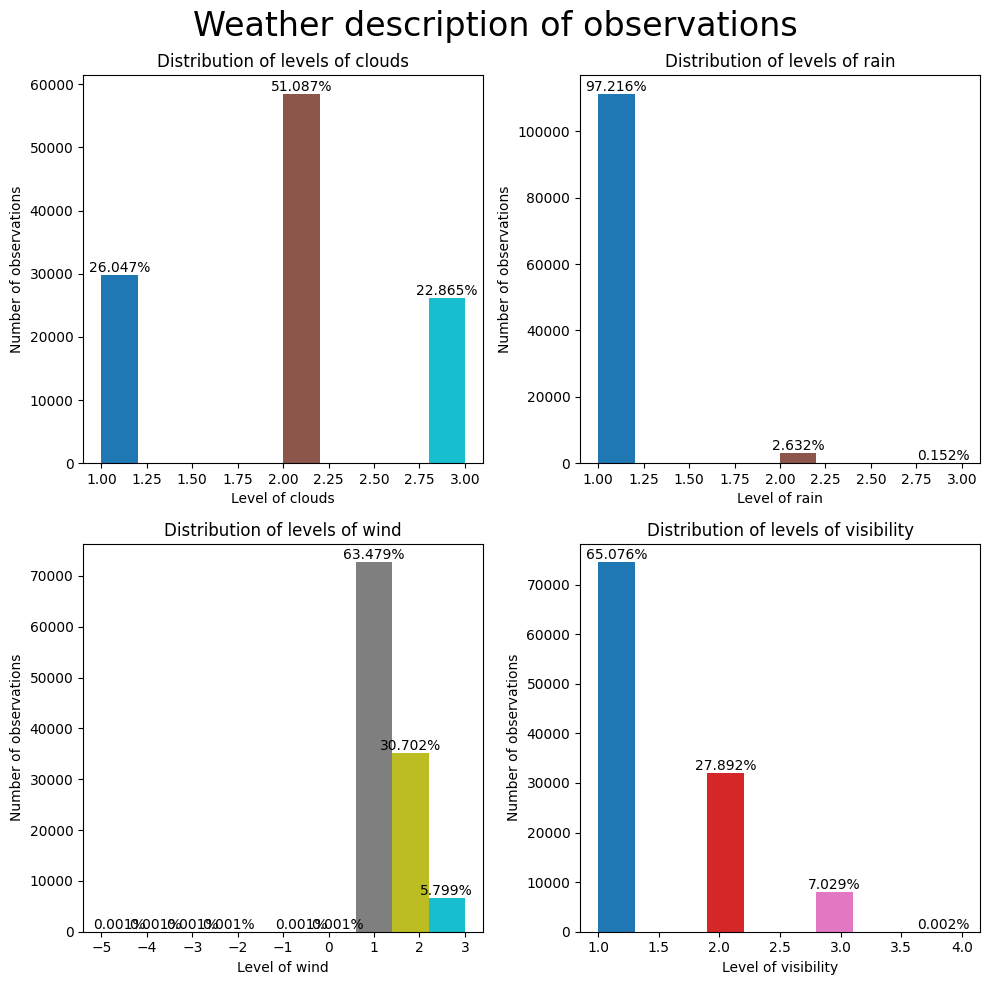

In [17]:
#now lets's show all of it on one figure

fig, axes = plt.subplots(2, 2, figsize = (10, 10))
fig.suptitle("Weather description of observations", fontsize = 24)


plot_distribution(axes[0, 0], df_observations["nuages"], "Level of clouds", "Number of observations", "Distribution of levels of clouds" )

plot_distribution(axes[0, 1],df_observations["pluie"], "Level of rain", "Number of observations", "Distribution of levels of rain" )

plot_distribution(axes[1, 0], df_observations["vent"], "Level of wind", "Number of observations", "Distribution of levels of wind" )

plot_distribution(axes[1, 1], df_observations["visibilité"], "Level of visibility", "Number of observations", "Distribution of levels of visibility" )


plt.tight_layout()
plt.savefig("figures/weather.jpeg")
plt.show()

In [18]:
# let's look for sites with fewer than 10 completed visits
visited = df_observations["Nom transect"].value_counts()

fewVisited = visited[visited < 10]
print(f"There are {len(fewVisited)} transects who have been visited less than 10 times")
print(fewVisited)

There are 0 transects who have been visited less than 10 times
Series([], Name: count, dtype: int64)


The average of species per site is 34.88 and the standard deviation is 5.66.
Nom transect
fonds préville        41
canal dillon          41
morne babet           41
hôtel des plaisirs    43
canal cocotte         44
lafayette             44
fond rousseau         45
génipa                45
aéroport              46
autre bord            48
Name: ESPECE, dtype: int64


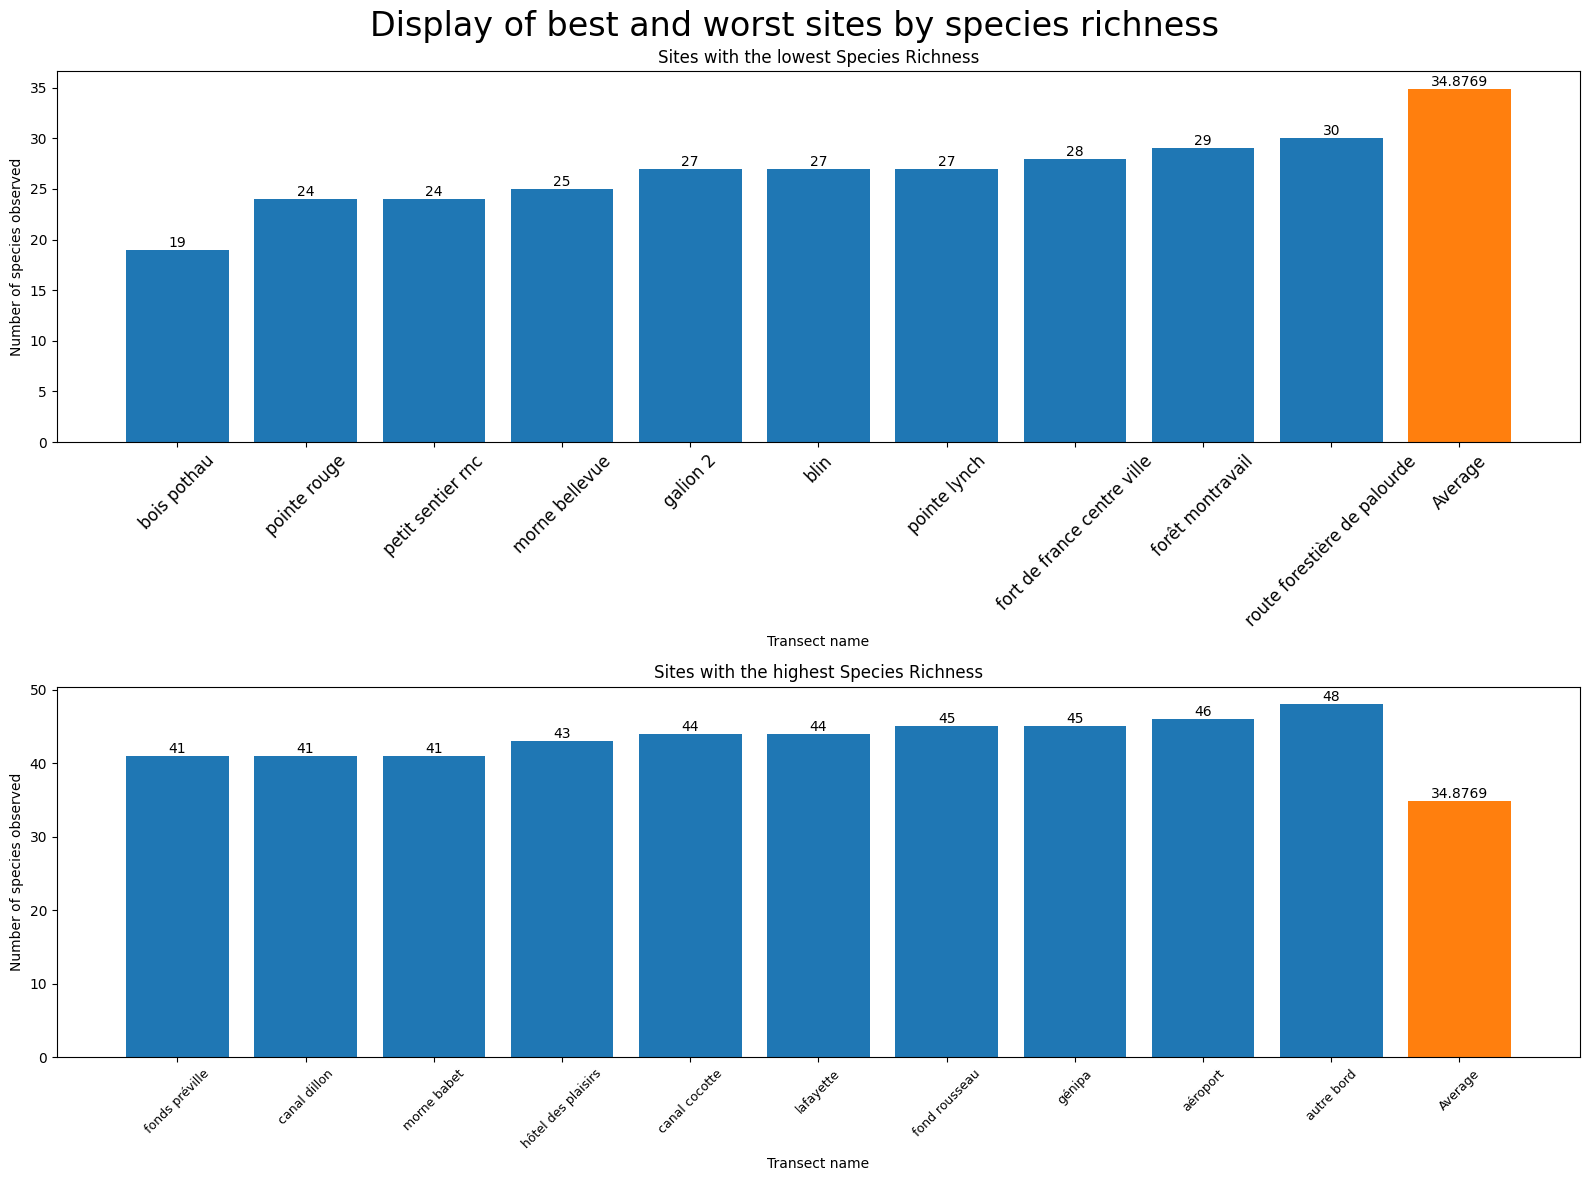

In [53]:
grouped = df_observations.groupby("Nom transect")["ESPECE"].nunique()


mean = grouped.mean()
var = grouped.std()

print(f"The average of species per site is {mean:.2f} and the standard deviation is {var:.2f}.")

sorted = grouped.sort_values()

nSites = 10

poorest = sorted[:nSites]

richest = sorted[-nSites:]

fig, axes = plt.subplots(2, figsize=(16, 12))
fig.suptitle("Display of best and worst sites by species richness", fontsize = 24)

valsPooor = np.array([val for key, val in poorest.items()])

valsRich = np.array([val for key, val in richest.items()])

bars1 = axes[0].bar(poorest.keys(), valsPooor)
axes[0].bar_label(bars1)
axes[0].tick_params(axis = 'x', labelsize = 12, rotation = 45)
axes[0].set_xlabel("Transect name")
axes[0].set_ylabel("Number of species observed")
axes[0].set_title(f"Sites with the lowest Species Richness")
meanBar = axes[0].bar("Average", mean)
axes[0].bar_label(meanBar)

bars2 = axes[1].bar(richest.keys(), valsRich)
axes[1].bar_label(bars2)
axes[1].set_xlabel("Transect name")
axes[1].set_ylabel("Number of species observed")

axes[1].set_title("Sites with the highest Species Richness")
axes[1].tick_params(axis = 'x', labelsize = 9, rotation = 45)
meanBar = axes[1].bar("Average", mean)
axes[1].bar_label(meanBar)
print(richest)
plt.tight_layout()
plt.savefig("figures/richnessSite.jpeg")

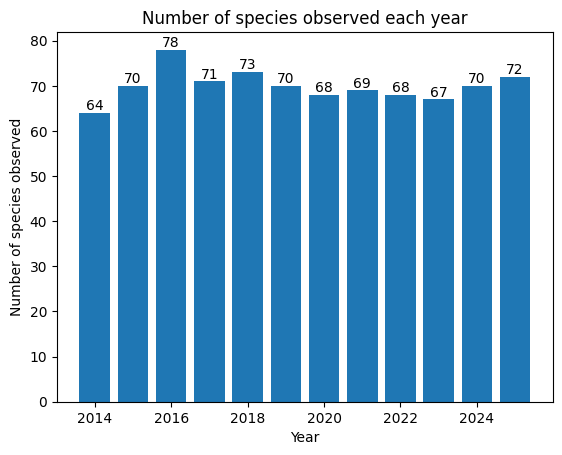

In [20]:
groupedYear = df_observations.groupby('year')['ESPECE'].nunique()

bars = plt.bar(groupedYear.keys(), groupedYear.values)
plt.bar_label(bars)
plt.xlabel("Year")
plt.ylabel("Number of species observed")
plt.title("Number of species observed each year")
plt.savefig("figures/speciesPerYear.jpeg")

[Text(0, 0, '9541.25')]

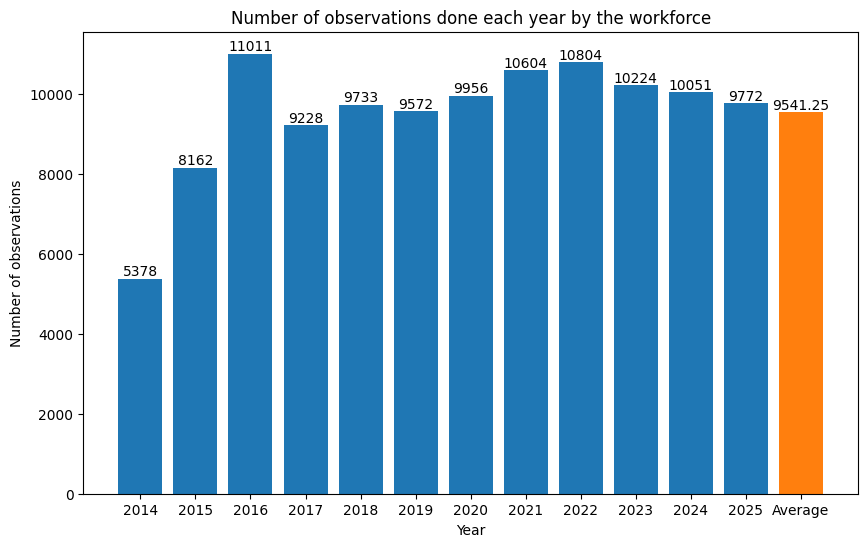

In [21]:
# now for the workload
observationsYear = df_observations.groupby('year')['ESPECE'].count()
plt.figure(figsize=(10, 6))  # width=10 inches, height=6 inches
bars = plt.bar(observationsYear.keys().astype(str), observationsYear.values)
plt.bar_label(bars)
plt.xlabel("Year")
plt.ylabel("Number of observations")
plt.title("Number of observations done each year by the workforce")
plt.savefig("figures/observationsYear.jpeg")

mean = observationsYear.mean()
plt.bar_label(plt.bar("Average", mean))

In [22]:
not_in_species = df_observations.loc[
    ~df_observations["clean_espece"].isin(df_species["clean_name"]),
    "ESPECE"
].unique()
print(not_in_species)

print('Trochilidae' in not_in_species)

count = 0
for val in df_observations["ESPECE"]:
    if val in not_in_species:
        count += 1

print(count)




['Trochilidae' 'Columbidae' 'Estrildidae' 'RAS' 'Limicole' 'Hirundinidae'
 'Apodidae' 'Fauconidae' 'Sterne sp' 'Mimidae ' 'Moqueur  sp.'
 'Lonchura sp.' 'Bécasseau semipalmé' 'trochilidae' 'Anatidae' 'Martinet'
 'Pigeon à cou rouge' 'Egretta sp.' 'Capucin sp' 'Gallinacées' 'Falconidé'
 'Héron ?']
True
1216


In [23]:
unknown_species_mapping = {
    "trochilidae": [
        "colibri à tête bleue",
        "colibri falle-vert",
        "colibri huppé",
        "colibri madère"
    ],
    "columbidae": [
        "colombe à croissant",
        "colombe à queue noire",
        "colombe rouviolette",
        "tourterelle à queue carrée",
        "tourterelle oreillarde",
        "tourterelle turque",
        "pigeon biset domestique",
        "pigeon à cou rouge"
    ],
    "estrildidae": [
        "astrild à joues orange",
        "astrild cendré",
        "astrild ondulé"
    ],
    "ras": [],
    "limicole": [
        "bécasseau minuscule",
        "gravelot semipalmé",
        "tournepierre à collier",
        "huîtrier d’amérique"
    ],
    "hirundinidae": [
        "hirondelle rustique",
        "hirondelle de rivage",
        "hirondelle à ventre blanc"
    ],
    "apodidae": [
        "martinet chiquesol",
        "martinet sombre"
    ],
    "fauconidae": [
        "faucon émerillon",
        "faucon pèlerin",
        "crécerelle d’amérique"
    ],
    "falconidé": [
        "faucon émerillon",
        "faucon pèlerin",
        "crécerelle d’amérique"
    ],
    "sterne sp": [
        "sterne bridée",
        "sterne de dougall",
        "sterne fuligineuse",
        "sterne royale"
    ],
    "mimidae": [
        "moqueur corossol",
        "moqueur des savanes",
        "moqueur gorge blanche",
        "moqueur grivotte"
    ],
    "moqueur sp.": [
        "moqueur corossol",
        "moqueur des savanes",
        "moqueur gorge blanche",
        "moqueur grivotte"
    ],
    "lonchura sp.": [
        "capucin à tête blanche",
        "capucin à tête noire"
    ],
    "bécasseau semipalmé": [
        "gravelot semipalmé"
    ],
    "anatidae": [
        "canard musqué"
    ],
    "martinet": [
        "martinet chiquesol",
        "martinet sombre"
    ],
    "capucin sp": [
        "capucin à tête blanche",
        "capucin à tête noire"
    ],
    "egretta sp.": [
        "aigrette bleue",
        "aigrette garzette",
        "aigrette neigeuse",
        "aigrette tricolore"
    ],
    "gallinacées": [
        "coq bankiva"
    ],
    "héron ?": [
        "bihoreau gris",
        "bihoreau violacé",
        "héron garde-bœuf",
        "héron vert",
        "grande héron"
    ]
}


def compute_species_probabilities(df_observations, unknown_species_mapping):
    probabilities = {}

    for group, species_list in unknown_species_mapping.items():
        if not species_list:
            continue 

        # Filter observations to only those in the current species list
        mask = df_observations["clean_espece"].isin(species_list)
        subset = df_observations[mask]

        if subset.empty:
            # Uniform fallback if no observations for this group
            n = len(species_list)
            probabilities[group] = {sp: 1/n for sp in species_list}
            continue

        # Count the total number of individuals observed per species
        counts = (
            subset.groupby("clean_espece")["Amount"]
            .sum()
            .reindex(species_list, fill_value=0)
        )

        # Normalize to get probabilities
        total = counts.sum()
        if total == 0:
            # Uniform fallback if all values are null
            probs = {sp: 1/len(species_list) for sp in species_list}
        else:
            probs = (counts / total).to_dict()

        probabilities[group] = probs

    return probabilities
    

species_probabilities = compute_species_probabilities(df_observations, unknown_species_mapping)
for group, probs in species_probabilities.items():
    print(f"{group} → {probs}")


def assign_unknown_species(row, species_probabilities):
    group = row["clean_espece"]

    if group in species_probabilities:
        probs = species_probabilities[group]
        species = list(probs.keys())
        probabilities = np.array(list(probs.values()), dtype=float)

        probabilities = probabilities / probabilities.sum()

        assigned_species = np.random.choice(species, p=probabilities)
        return assigned_species

    else:
        return group

df_observations["clean_espece"] = df_observations.apply(
    assign_unknown_species, axis=1, species_probabilities=species_probabilities
)

not_in_species = df_observations.loc[
    ~df_observations["clean_espece"].isin(df_species["clean_name"]),
    "ESPECE"
].unique()
print(not_in_species)

count = 0
for val in df_observations["ESPECE"]:
    if val in not_in_species:
        count += 1

print(count)

trochilidae → {'colibri à tête bleue': 0.006390683803166939, 'colibri falle-vert': 0.11638145281545126, 'colibri huppé': 0.5159412057090109, 'colibri madère': 0.36128665767237095}
columbidae → {'colombe à croissant': 6.34226006437394e-05, 'colombe à queue noire': 0.07396660800076107, 'colombe rouviolette': 0.026986316573911113, 'tourterelle à queue carrée': 0.6443419112400705, 'tourterelle oreillarde': 6.34226006437394e-05, 'tourterelle turque': 0.10911858440755363, 'pigeon biset domestique': 0.14520604417384134, 'pigeon à cou rouge': 0.0002536904025749576}
estrildidae → {'astrild à joues orange': 0.04615209730589974, 'astrild cendré': 0.020461520973059, 'astrild ondulé': 0.9333863817210413}
limicole → {'bécasseau minuscule': 0.10211267605633803, 'gravelot semipalmé': 0.38380281690140844, 'tournepierre à collier': 0.5140845070422535, 'huîtrier d’amérique': 0.0}
hirundinidae → {'hirondelle rustique': 0.23823286540049546, 'hirondelle de rivage': 0.0, 'hirondelle à ventre blanc': 0.761767

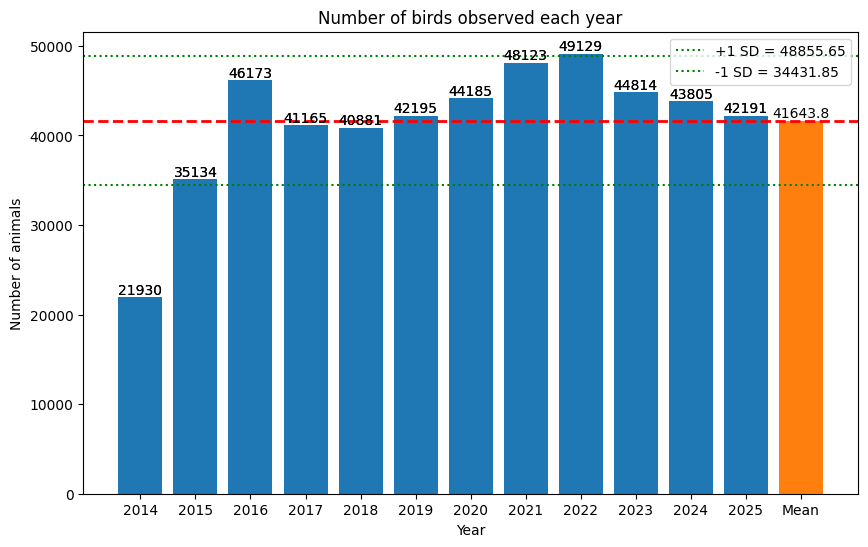

In [24]:
amountGrouped = df_observations.groupby('year')["Amount"].sum()
plt.figure(figsize=(10, 6))  # width=10 inches, height=6 inches

bars = plt.bar(amountGrouped.keys().astype(str), amountGrouped.values)
plt.bar_label(bars)
plt.xlabel("Year")
plt.ylabel("Number of animals")
plt.title("Number of birds observed each year")

mean = amountGrouped.mean()
meanBar = plt.bar("Mean", mean)
plt.bar_label(bars)
plt.bar_label(meanBar)

std = amountGrouped.std()

plt.axhline(mean, color='red', linestyle='--', linewidth=2)
plt.axhline(mean + std, color='green', linestyle=':', linewidth=1.5, label=f'+1 SD = {mean+std:.2f}')
plt.axhline(mean - std, color='green', linestyle=':', linewidth=1.5, label=f'-1 SD = {mean-std:.2f}')
plt.legend()
plt.savefig("figures/amountYear.jpeg")

In [25]:
print(amountGrouped.values.sum() == df_observations["Amount"].sum())

True


0.1424122507496781


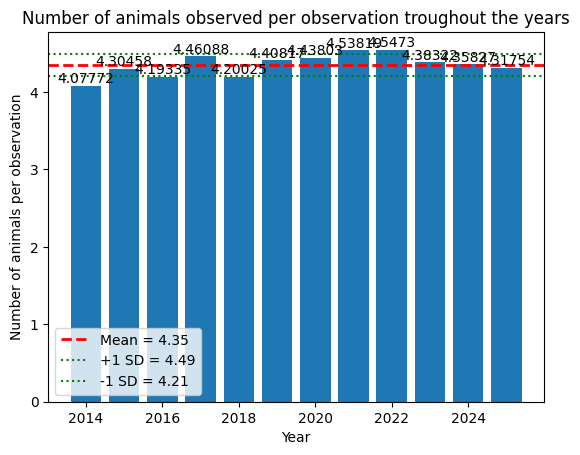

In [26]:
animalsPerObservations = amountGrouped / observationsYear


bars = plt.bar(animalsPerObservations.keys(), animalsPerObservations.values)
plt.bar_label(bars)
plt.xlabel("Year")
plt.ylabel("Number of animals per observation")
plt.title("Number of animals observed per observation troughout the years")

mean = animalsPerObservations.mean()
std = animalsPerObservations.std()

plt.axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.2f}')
plt.axhline(mean + std, color='green', linestyle=':', linewidth=1.5, label=f'+1 SD = {mean+std:.2f}')
plt.axhline(mean - std, color='green', linestyle=':', linewidth=1.5, label=f'-1 SD = {mean-std:.2f}')

plt.legend()


plt.savefig("figures/amountYearNorm.jpeg")

print(animalsPerObservations.std())

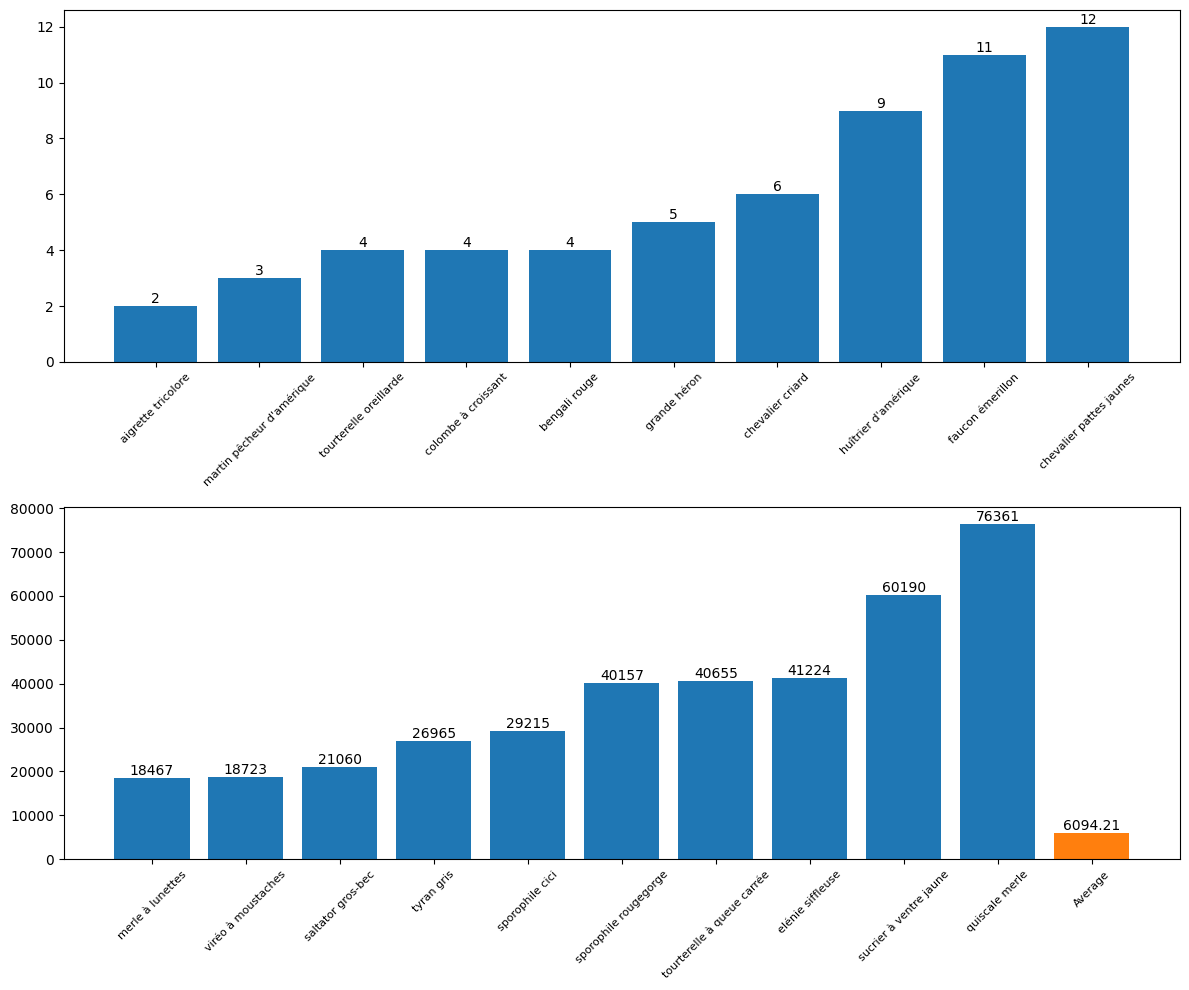

In [54]:
df_observations2 = df_observations[df_observations["clean_espece"] != "ras"]
amountPerSpecie =  df_observations2.groupby("clean_espece")["Amount"].sum()
amountSorted= amountPerSpecie.sort_values()
leastAppeared = amountSorted[:10]
mostAppeared = amountSorted[-10:]

fig, axes = plt.subplots( 2, 1, figsize =(12, 10))

mean = amountPerSpecie.mean()
barslow = axes[0].bar(leastAppeared.keys(), leastAppeared.values)


barshigh = axes[1].bar(mostAppeared.keys(), mostAppeared.values)
axes[0].tick_params(axis = 'x', labelsize = 8, rotation = 45)
axes[1].tick_params(axis = 'x', labelsize = 8, rotation = 45)


axes[0].bar_label(barslow)
axes[1].bar_label(barshigh)
axes[1].bar_label(plt.bar("Average", mean))

fig.tight_layout()

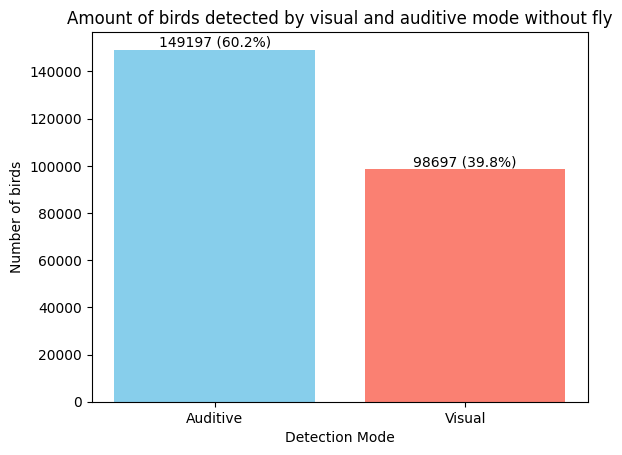

In [44]:

visualAmount = df_observations["Visuel"].sum()

auditifAmount = df_observations["Auditif"].sum()

total = visualAmount + auditifAmount
x = ["Auditive", "Visual"]
y = [auditifAmount, visualAmount]

fig, ax = plt.subplots()

plt.xlabel("Detection Mode")
plt.ylabel("Number of birds")
plt.title("Amount of birds detected by visual and auditive mode without fly")

bar = ax.bar(x, y, color=['skyblue', 'salmon'])

percentages = [f'{val} ({(val/total)*100:.1f}%)' for val in y]

ax.bar_label(bar, labels=percentages, label_type='edge')

plt.title("Amount of birds detected by visual and auditive mode without fly")
plt.savefig("figures/AudiVisual.jpeg")
plt.show()


499749


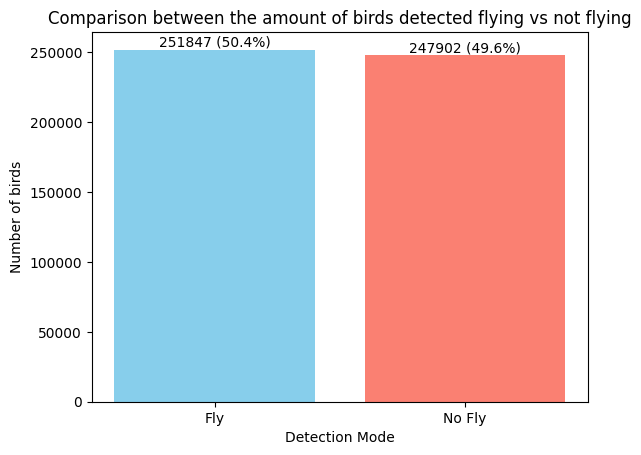

In [ ]:
detectedFly = df_observations["A+V Vol"].sum()

detectedNoFly = df_observations["A+V"].sum()

total = detectedFly + detectedNoFly
x = ["Fly", "No Fly"]
y = [detectedFly, detectedNoFly]
fig, ax = plt.subplots()

plt.xlabel("Detection Mode")
plt.ylabel("Number of birds")
plt.title("Comparison between the amount of birds detected flying vs not flying")

bar = ax.bar(x, y, color=['skyblue', 'salmon'])

percentages = [f'{val} ({(val/total)*100:.1f}%)' for val in y]

ax.bar_label(bar, labels=percentages, label_type='edge')

plt.savefig("figures/flyVsNoFly.jpeg")
plt.show()

In [48]:
df_observations

,Nom observateur,Nom transect,date,"1er, 2e ou 3e passage",nuages,pluie,vent,visibilité,N° point,heure début,...,Unnamed: 19,Unnamed: 20,Auditif,Visuel,A+V,A+V Vol,Unnamed: 25,Amount,year,clean_espece
2,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,1,0,1,1,NaN,2,2014,sucrier à ventre jaune
3,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,0,1,1,1,NaN,2,2014,sporophile cici
4,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,0,2,2,2,NaN,4,2014,colibri falle-vert
5,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,1,0,1,1,NaN,2,2014,elénie siffleuse
6,BELFAN David,fond l'etang,2014-04-12,1.0,2.0,1.0,1.0,1.0,1.0,06:20:00,...,NaN,NaN,1,0,1,1,NaN,2,2014,coulicou manioc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114492,MAUGEE Lévy,post-colon,2025-05-01,1.0,2.0,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,2,0,2,2,NaN,4,2025,sporophile rougegorge
114493,MAUGEE Lévy,post-colon,2025-05-01,1.0,2.0,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,1,0,1,1,NaN,2,2025,saltator gros-bec
114494,MAUGEE Lévy,post-colon,2025-05-01,1.0,2.0,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,2,0,2,2,NaN,4,2025,sucrier à ventre jaune
114495,MAUGEE Lévy,post-colon,2025-05-01,1.0,2.0,1.0,1.0,1.0,10.0,08:45:00,...,NaN,NaN,3,0,3,3,NaN,6,2025,viréo à moustaches
